In [125]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
data = pd.read_csv("./diabetes.csv")

In [127]:
data.shape


(768, 9)

In [128]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


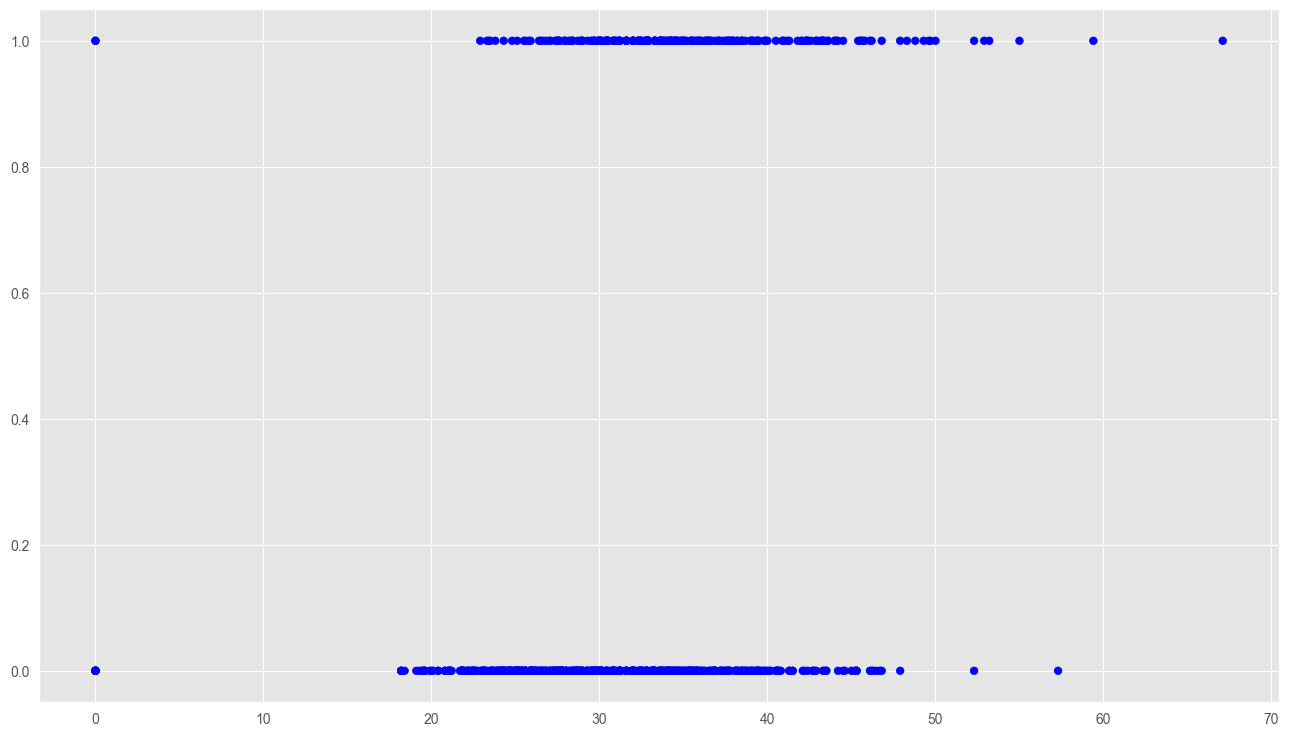

In [130]:
colores=['orange','blue']
tamanios=[30,60]
f1 = data['BMI'].values
f2 = data['Outcome'].values
asignar=[]
for index, row in data.iterrows():
 if(row['BMI']>1808):
     asignar.append(colores[0])
 else:
     asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

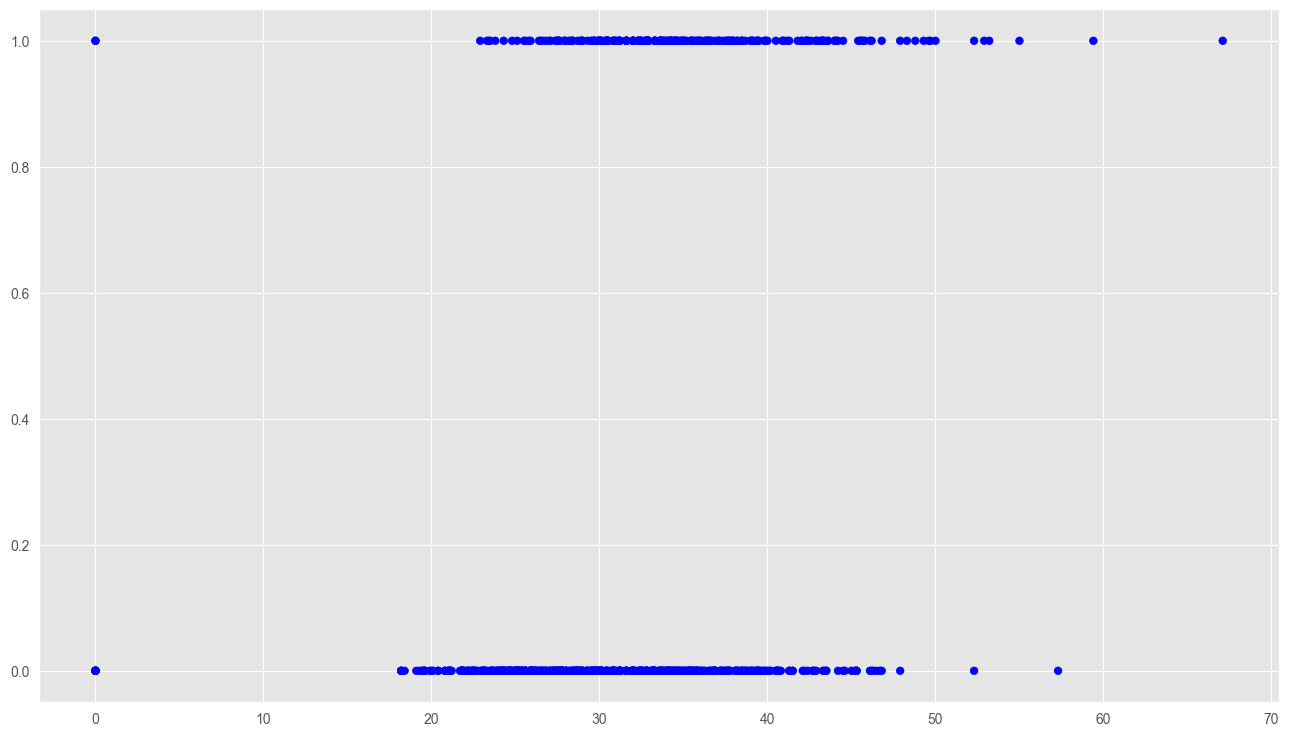

In [131]:
filtered_data = data[(data['BMI'] <= 3500) & (data['Outcome'] <= 80000)]
f1 = filtered_data['BMI'].values
f2 = filtered_data['Outcome'].values
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
 if(row['BMI']>1808):
     asignar.append(colores[0])
 else:
     asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [132]:
filtered_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [133]:
dataX =filtered_data[["BMI"]]
X_train = np.array(dataX)
y_train = filtered_data['Outcome'].values

In [134]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [0.01770653]
Independent term: 
 -0.21751921597439988
Mean squared error: 0.21
Variance score: 0.09


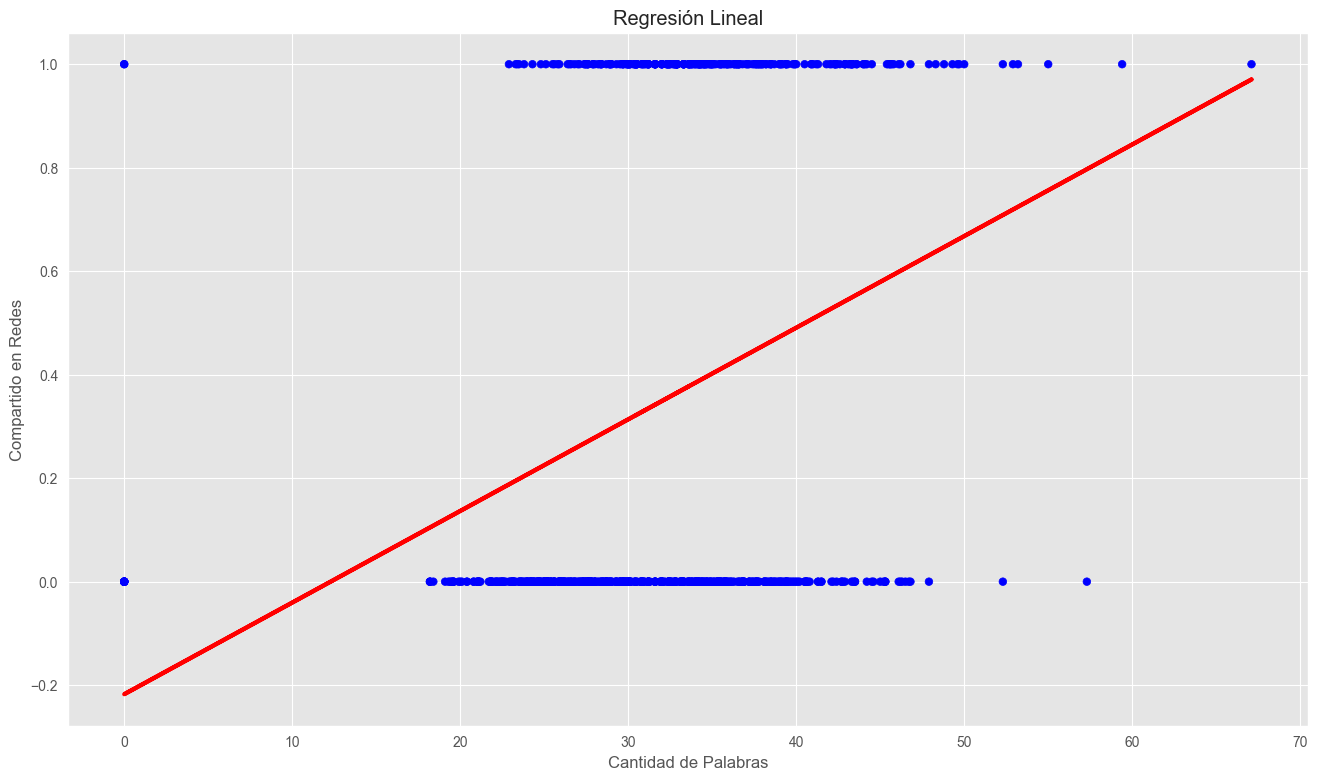

In [135]:
plt.scatter(X_train[:,0], y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')
plt.show()


In [136]:
y_Dosmil = regr.predict([[2000]])
first_prediction = y_Dosmil[0]  # Access the first element (assuming single prediction)
print(int(first_prediction))


35


In [137]:
# Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces,
# comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) +
        filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma

XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values


KeyError: '# of Links'

In [138]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))


NameError: name 'XY_train' is not defined

AttributeError: 'LinearRegression' object has no attribute 'coef_'

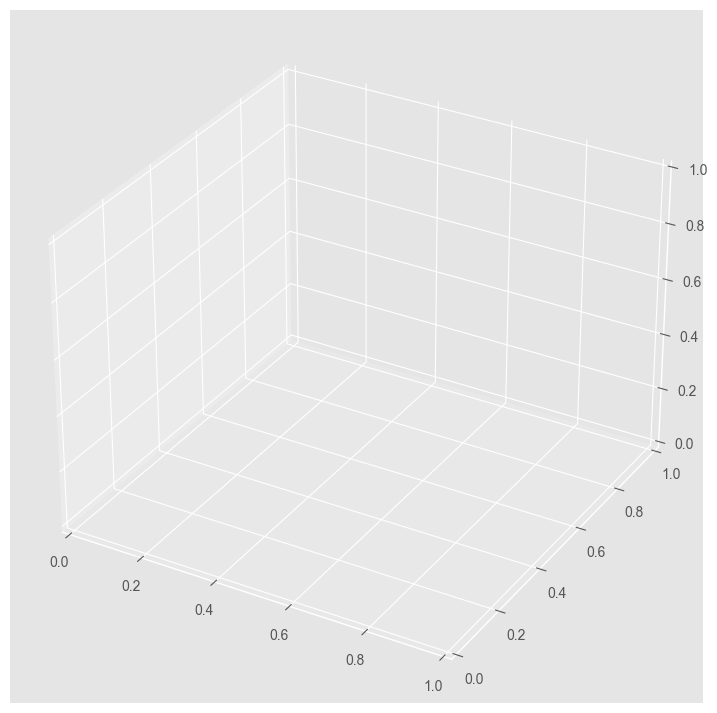

In [139]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
# Graficamos en rojo, los puntos que
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()


In [ ]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

In [140]:
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)


NameError: name 'z_train' is not defined

In [141]:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)

NameError: name 'z_train' is not defined

In [142]:
diferenciaComparir = z_Dosmil - y_Dosmil
print(int(diferenciaComparir))


NameError: name 'z_Dosmil' is not defined